<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Data Science Project
  <hr style="border-top: 1px solid #0A6EBD;">
  <i>Investigating Meteor-Related Phenomena<br>and their Association with Light Pollution</i>
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage III_2 - EDA
</div>

In [1]:
import pandas
import os
import logging
import sys
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
logger = logging.getLogger()
logger.setLevel((logging.INFO))

handler = logging.FileHandler("log_2.txt")
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Print log messages to stdout
stream_handler = logging.StreamHandler(sys.stdout)
stream_handler.setFormatter(formatter)
stream_handler.setLevel(logging.INFO)

# Check if logger already has a handler
if not logger.handlers:
    logger.addHandler(handler)
    logger.addHandler(stream_handler)

In [3]:
df_GMN_raw = pandas.DataFrame()

# Read all the json file in ../Data/Raw/gmn and concatenate them into df_GMN_raw
for file in os.listdir("../Data/Raw/gmn"):
    if file.endswith(".json"):
        tmp_df = pandas.read_json("../Data/Raw/gmn/" + file)
        df_GMN_raw = pandas.concat([df_GMN_raw, tmp_df], ignore_index=True)
        logger.info("File " + file + " has been read and concatenated to df_GMN_raw")

2024-01-06 09:41:41,151 - root - INFO - File 2018-12-10.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,172 - root - INFO - File 2018-12-11.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,184 - root - INFO - File 2018-12-12.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,214 - root - INFO - File 2018-12-13.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,234 - root - INFO - File 2018-12-14.json has been read and concatenated to df_GMN_raw


2024-01-06 09:41:41,256 - root - INFO - File 2018-12-15.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,275 - root - INFO - File 2018-12-18.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,285 - root - INFO - File 2018-12-19.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,295 - root - INFO - File 2018-12-20.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,304 - root - INFO - File 2018-12-21.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,315 - root - INFO - File 2018-12-22.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,332 - root - INFO - File 2018-12-23.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,348 - root - INFO - File 2018-12-24.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,361 - root - INFO - File 2018-12-26.json has been read and concatenated to df_GMN_raw
2024-01-06 09:41:41,373 - root - INFO - File 2

In [4]:
df_GMN_raw

,datetime,Vavg,Duration,Peak,PeakHt,Participating,Num,LatBeg,LonBeg,LatEnd,LonEnd,HtBeg,HtEnd,iau_code,RAapp,DECapp,Masskg
0,2018-12-10 09:32:40,34.27273,0.25,1.23,92.0256,"US0002,US0008",2,35.052966,-106.159659,35.055140,-106.153555,97.5425,89.1157,GEM,111.44139,33.30398,0.000018
1,2018-12-10 09:36:53,67.22096,0.57,-1.85,105.6624,"US0007,US0008",2,35.271967,-106.830733,35.454967,-107.071817,114.3465,95.3816,...,155.43099,-9.41475,0.000154
2,2018-12-10 09:40:42,30.35163,0.28,0.30,87.7637,"US0002,US0009",2,34.584666,-107.569102,34.583109,-107.569460,91.7361,83.3474,THA,116.92116,35.77926,0.000048
3,2018-12-10 09:45:43,31.50538,0.36,0.30,89.6319,"US0007,US0008",2,35.661923,-107.057795,35.668028,-107.046594,94.7433,84.5834,...,111.65894,31.61662,0.000060
4,2018-12-10 09:54:18,30.36280,0.40,0.71,89.2188,"US0007,US0008",2,35.452774,-107.223303,35.458019,-107.212827,95.4599,84.7777,THA,114.31161,32.14460,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158585,2024-01-01 06:44:49,39.87891,0.29,0.06,88.7692,"US0004,US000J,US000L",3,35.631850,-107.092916,35.641439,-107.159223,95.0039,86.9562,...,134.84670,22.06235,0.000035
1158586,2024-01-01 06:44:58,19.74063,0.60,1.85,88.2680,"USL007,USL008,USL00C,USL00D",4,35.054810,-111.699246,35.059732,-111.687691,92.9914,81.5538,...,83.57203,32.12437,0.000057
1158587,2024-01-01 06:45:00,63.78130,0.62,-1.39,104.2822,"US0020,USL005,USL00A,USL00B,USL00J,USL012,USL...",9,33.300850,-111.328004,33.208168,-111.672778,112.4786,99.5346,COM,171.31852,25.60149,0.000093
1158588,2024-01-01 06:47:09,56.90103,0.21,-0.53,103.7215,"UK002S,UK002U,UK0032,UK005H,UK0072,UK007M",6,52.892186,-2.159486,52.934191,-2.136482,110.5191,98.0026,...,192.17868,31.88217,0.000025


# Question 2

**Question** In a meteor shower, how does meteors variates from radiant points?

**Contribution** Have different strategy to obverse best area for each of meteor shower. Find what comets/dusts trails are more spreader?

**How**: 

In [5]:
# Keep only "iau_code", "RAapp", "DECapp", "datetime"
df_GMN = df_GMN_raw[["iau_code", "RAapp", "DECapp", "datetime"]].copy()

# Group by "iau_code" and compute the mean and std of "RAapp" and "DECapp", the number of observations
df_GMN = df_GMN.groupby("iau_code").agg({"RAapp": ["mean", "std", "count"], "DECapp": ["mean", "std"]})
df_GMN.columns = ["RAapp_mean", "RAapp_std", "count", "DECapp_mean", "DECapp_std"]

# Sort by "count" in descending order
df_GMN = df_GMN.sort_values(by="count", ascending=False)

df_GMN

,RAapp_mean,RAapp_std,count,DECapp_mean,DECapp_std
iau_code,,,,,
...,170.743023,104.658065,809773,21.544685,31.569070
PER,46.073647,6.652418,55918,57.562857,1.514423
GEM,113.419458,2.025160,53597,32.682655,0.845023
ORI,96.547261,3.960727,29060,15.826639,0.665022
SDA,340.784571,2.749595,10076,-15.465946,1.200826
...,...,...,...,...,...
LLY,287.622794,3.607276,15,28.777067,1.414848
MBE,320.881270,1.333675,12,6.535932,1.115748
ARD,269.894229,4.225405,7,-38.854897,8.359853


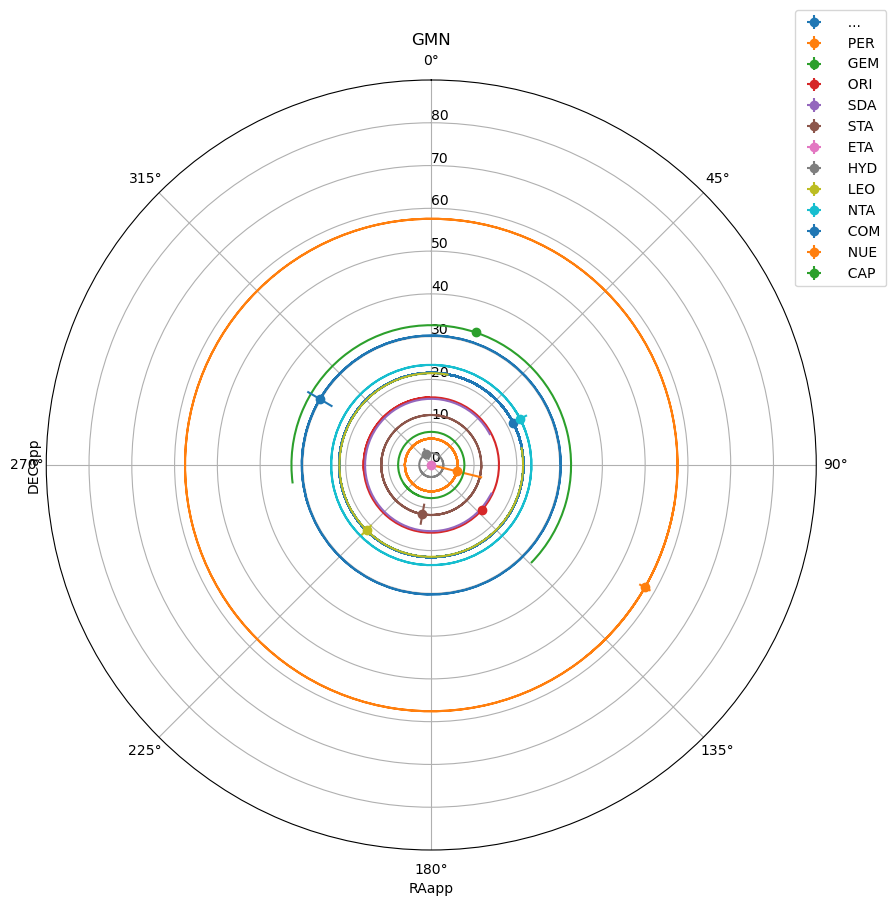

In [6]:
# Create polar plot of the mean of "RAapp" and "DECapp" for each "iau_code" with error bars of the std of "RAapp" and "DECapp" for each "iau_code". Set the 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(0, 90)
ax.set_rticks(np.arange(0, 90, 10))
ax.set_rlabel_position(0)
ax.set_title("GMN")
ax.set_xlabel("RAapp")
ax.set_ylabel("DECapp")
ax.grid(True)

for iau_code in df_GMN.index[0:13]:
    ax.errorbar(df_GMN.loc[iau_code]["RAapp_mean"], df_GMN.loc[iau_code]["DECapp_mean"], xerr=df_GMN.loc[iau_code]["RAapp_std"], yerr=df_GMN.loc[iau_code]["DECapp_std"], fmt="o", label=iau_code)

ax.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()

In [7]:
# Sort by "DECapp_std" in descending order
df_GMN = df_GMN.sort_values(by="DECapp_std", ascending=False)
df_GMN

,RAapp_mean,RAapp_std,count,DECapp_mean,DECapp_std
iau_code,,,,,
...,170.743023,104.658065,809773,21.544685,31.569070
KCG,287.584102,7.542655,2054,48.674610,11.354256
OAN,288.366402,126.929193,535,41.160138,10.446840
PIP,93.849986,9.871948,239,-24.919966,8.866437
ARD,269.894229,4.225405,7,-38.854897,8.359853
...,...,...,...,...,...
PAN,354.888887,1.066106,65,46.984268,0.709512
ORI,96.547261,3.960727,29060,15.826639,0.665022
SPE,48.597448,4.641885,1848,39.766048,0.646796


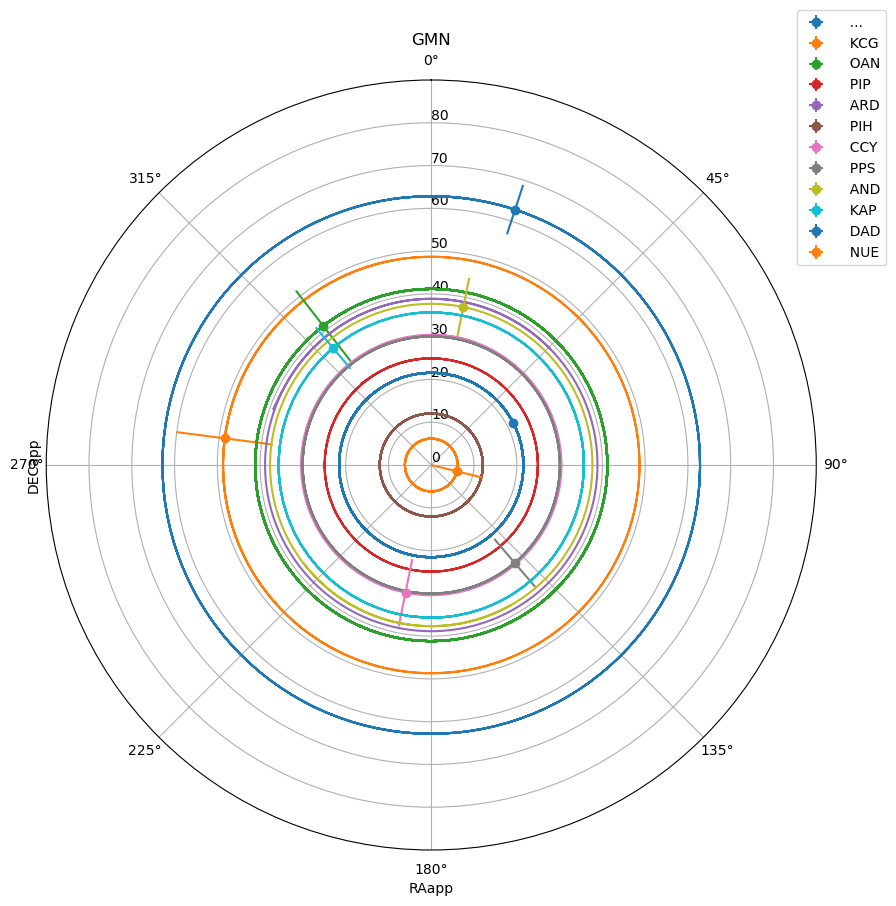

In [8]:
# Create polar plot of the mean of "RAapp" and "DECapp" for each "iau_code" with error bars of the std of "RAapp" and "DECapp" for each "iau_code". Set the 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(0, 90)
ax.set_rticks(np.arange(0, 90, 10))
ax.set_rlabel_position(0)
ax.set_title("GMN")
ax.set_xlabel("RAapp")
ax.set_ylabel("DECapp")
ax.grid(True)

for iau_code in df_GMN.index[0:12]:
    ax.errorbar(df_GMN.loc[iau_code]["RAapp_mean"], df_GMN.loc[iau_code]["DECapp_mean"], xerr=df_GMN.loc[iau_code]["RAapp_std"], yerr=df_GMN.loc[iau_code]["DECapp_std"], fmt="o", label=iau_code)

ax.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()